---
# Exploring Trip Length of Different User Types 
# Using Toronto Bikeshare Ridership Data

### Xin Peng
### Feb 2, 2020
---

Due to the transport flexibility, reductions to vehicle emissions, health benefits, reduced congestion and fuel consumption, and financial savings for individuals, more and more people in Toronto choose to use share bike to go round the city. Just in last month, January 2020, [11.25M in Funding is proposed to boost Toronto's bike share program](https://torontostoreys.com/bike-share-toronto-funding-proposed/). <br />
Since in earlier time, Yizhao Tan has already explored [the relationship between total number of trips and user types](https://towardsdatascience.com/exploring-toronto-bike-share-ridership-using-python-3dc87d35cb62), so in this report, I wanted to further investigate the difference in behavior of user type member and casual, and mainly focus on the relationship between trip length and user types. And this can further explain how different user types are using Bike Share, and reveals the main purpose of using share bikes for member and casual users.

## About the Data

In this report, I will mainly use data from two sources, one is 2016 Q3, 2016 Q4, and 2017 Toronto Bikeshare ridership data, from the website of [Open Data Toronto](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/). Since the data has the Open Government License Toronto, which means a I can ["Copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful purpose"](https://open.toronto.ca/open-data-license/), so I directly downloaded the XLSXs and CSVs. And the original data is stored in quarters, not in years, and each row contains a unique trip and contains the columns of <br />
- trip_id: unique id for each trip
- trip_start_time: the start date and time for each trip
- trip_stop_time: the stop date and time for each trip
- trip_duration_seconds: duration of each trip measured in seconds
- from_station_id: the unique station id of start station (only in 2017 Q1, 2017 Q2)
- from_station_name: the name of the start station
- to_station_id: the unique station id of stop station (only in 2017 Q1, 2017 Q2)
- to_station_name: the name of the stop station
- user_type: whether the user is a member or buys a pass <br />
However, there are some inconsistencies of the above data:
1. the format of date is different in each dataset, and in single 2016 Q4, dates are stored in different ways.
2. from_station_id and to_station_id only exists in 2017 Q1, 2017 Q2, not in other datasets.
3. There are many trips with same from station and to station, and with 0s duration, which indicates potential error in storing data.
4. Inconsistent station names.

Another data I will use in this report is Historical Weather Data available from [Government of Canada](https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=1). However, in the website, it says that ["Unless otherwise specified you may reproduce the materials in whole or in part for non-commercial purposes, and in any format, without charge or further permission, provided you do the following: exercise due diligence in ensuring the accuracy of the materials reproduced; indicate both the complete title of the materials reproduced, as well as the author (where available); indicate that the reproduction is a copy of the version"](https://www.canada.ca/en/transparency/terms.html). And ["unless otherwise specified, you may not reproduce materials on this site, in whole or in part, for the purposes of commercial redistribution without prior written permission from the copyright administrator."](https://www.canada.ca/en/transparency/terms.html) <br />
So if we ensure the accuracy, indicate complete title, and author, and also indicate that the data is copied from the original source, then we can reproduce the data for non-commercial purposes without charge or permission. But we cannot reproduce the data for commercial purposes unless otherwise specified or with a permission. <br />
So I scraped the wheather data from the website directly. The original data on the website is shown in each month, not in year. And each row indicates a day. In this report, I will only use two columns in this data:
- Mean Temp Definition °C: the average temperature of that day
- Total Precip mm: the total precipitation of that day <br />
However, there are some problems with the original data: <br />
- Directly scraped the data will also contain rows indicating 'Xtrm', 'Avg', 'Sum', and 'Summary, average and extreme values are based on the data above.'
- Missing values are not shown as NaN, but 'LegendTT', or 'LegendMM', and also some values contain some unnecessary parts, for example, '0.0' is stored as '0.0Legend'.

## Standardization

Before combining the data, since there are inconsistencies in data, so I need to standardized data first. First, I set from_station_id and to_station_id to NaN in 2016 Q3, 2016 Q4, 2017 Q3, 2017 Q4.

In [3]:
import pandas as pd
import numpy as np
bike_2016_q3 = pd.read_excel('bikeshare-ridership-2016-q3.xlsx')
bike_2016_q4 = pd.read_excel('bikeshare-ridership-2016-q4.xlsx')
bike_2016_q3["from_station_id"] = np.nan
bike_2016_q3["to_station_id"] = np.nan
bike_2016_q4["from_station_id"] = np.nan
bike_2016_q4["to_station_id"] = np.nan

Then, since the date formats are different in different datasets, so I standardized them into the format like 2017-01-31 20:01:00.

Since there are many different date formats in a single 2016 Q4, so I standardized them separately.

In [4]:
# break 2016 Q4 into multiple parts based on their date formats
new_2016_q4 = bike_2016_q4[:44432]
new_2016_q4_2 = bike_2016_q4[44432:]
new_2016_q4_2_1 = new_2016_q4_2[:56937]
new_2016_q4_2_2 = new_2016_q4_2[56937:92559]
new_2016_q4_2_3 = new_2016_q4_2[92559:136590]
new_2016_q4_2_4 = new_2016_q4_2[136590:158394]
new_2016_q4_2_5 = new_2016_q4_2[158394:]

In [5]:
for index, row in new_2016_q4.iterrows():
    new_2016_q4['trip_start_time'][index] = new_2016_q4['trip_start_time'][index].strftime("%m/%d/%Y %H:%M")

In [6]:
for index, row in new_2016_q4.iterrows():
    new_2016_q4['trip_start_time'][index] = pd.to_datetime(new_2016_q4['trip_start_time'][index], format='%d/%m/%Y %H:%M', errors='coerce')

In [7]:
# Read the datetime in the specified format
new_2016_q4_2_1['trip_start_time'] = pd.to_datetime(new_2016_q4_2_1['trip_start_time'], format='%d/%m/%Y %H:%M', errors='coerce')
# Read the datetime in the specified format
new_2016_q4_2_1['trip_stop_time'] = pd.to_datetime(new_2016_q4_2_1['trip_stop_time'], format='%d/%m/%Y %H:%M', errors='coerce')

In [8]:
# tansform datetime.datetime to string
for index, row in new_2016_q4_2_2.iterrows():
    new_2016_q4_2_2['trip_start_time'][index] = new_2016_q4_2_2['trip_start_time'][index].strftime("%Y/%d/%m %H:%M")

In [9]:
# transform string to specified format
for index, row in new_2016_q4_2_2.iterrows():
    new_2016_q4_2_2['trip_start_time'][index] = pd.to_datetime(new_2016_q4_2_2['trip_start_time'][index], format='%Y/%m/%d %H:%M', errors='coerce')

In [10]:
# Read the datetime in the specified format
new_2016_q4_2_3['trip_start_time'] = pd.to_datetime(new_2016_q4_2_3['trip_start_time'], format='%d/%m/%Y %H:%M', errors='coerce')
# Read the datetime in the specified format
new_2016_q4_2_3['trip_stop_time'] = pd.to_datetime(new_2016_q4_2_3['trip_stop_time'], format='%d/%m/%Y %H:%M', errors='coerce')

In [11]:
# tansform datetime.datetime to string
for index, row in new_2016_q4_2_4.iterrows():
    new_2016_q4_2_4['trip_start_time'][index] = new_2016_q4_2_4['trip_start_time'][index].strftime("%Y/%d/%m %H:%M")

In [12]:
# transform string to specified format
for index, row in new_2016_q4_2_4.iterrows():
    new_2016_q4_2_4['trip_start_time'][index] = pd.to_datetime(new_2016_q4_2_4['trip_start_time'][index], format='%Y/%m/%d %H:%M', errors='coerce')

In [13]:
# Read the datetime in the specified format
new_2016_q4_2_5['trip_start_time'] = pd.to_datetime(new_2016_q4_2_5['trip_start_time'], format='%d/%m/%Y %H:%M', errors='coerce')
# Read the datetime in the specified format
new_2016_q4_2_5['trip_stop_time'] = pd.to_datetime(new_2016_q4_2_5['trip_stop_time'], format='%d/%m/%Y %H:%M', errors='coerce')

In [14]:
import os
from datetime import timedelta
date_formats = {
    'Bikeshare Ridership (2017 Q1).csv': ['%d/%m/%Y %H:%M', -4],
    'Bikeshare Ridership (2017 Q2).csv': ['%d/%m/%Y %H:%M', -4],
    'Bikeshare Ridership (2017 Q3).csv': ['%m/%d/%Y %H:%M', 0],
    'Bikeshare Ridership (2017 Q4).csv': ['%m/%d/%y %H:%M:%S', 0],
}
df = pd.DataFrame() # Initiate an empty DataFrame
for fn, fmt in date_formats.items():
    tmp = pd.read_csv(os.path.join('', fn))
    
    # Read the datetime in the specified format
    tmp['trip_start_time'] = pd.to_datetime(tmp['trip_start_time'], format=fmt[0], errors='coerce')
    # Convert the input time to the Easter timezone
    tmp['trip_start_time'] = tmp['trip_start_time'] + timedelta(hours=fmt[1])
    
    # Read the datetime in the specified format
    tmp['trip_stop_time'] = pd.to_datetime(tmp['trip_stop_time'], format=fmt[0], errors='coerce')
    # Convert the input time to the Easter timezone
    tmp['trip_stop_time'] = tmp['trip_stop_time'] + timedelta(hours=fmt[1])

    df = pd.concat([df, tmp], sort=False).reset_index(drop=True)

## Data Combining

Since I have standardized data, so I combined all quarters into a new dataframe, and added columns year showing the year of the trip.

In [15]:
# Add year column
bike_2016_q3['year'] = '2016'
new_2016_q4['year'] = '2016'
new_2016_q4_2_1['year'] = '2016'
new_2016_q4_2_2['year'] = '2016'
new_2016_q4_2_3['year'] = '2016'
new_2016_q4_2_4['year'] = '2016'
new_2016_q4_2_5['year'] = '2016'
df['year'] = '2017'
# Combine to one dataframe
data_list = [bike_2016_q3, new_2016_q4, new_2016_q4_2_1, new_2016_q4_2_2, new_2016_q4_2_3, new_2016_q4_2_4, new_2016_q4_2_5, df]
all_quarters = pd.concat(data_list, sort = False)

Then, I added 'Date', 'Day', 'Month' as new columns to the dataframe. Here are some examples of these columns:
- Date: 2016-09-20
- Day: 20
- Month: 09

In [16]:
import datetime as dt
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

In [17]:
all_quarters['Date'] = all_quarters['trip_start_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
all_quarters['Day'] = all_quarters['trip_start_time'].apply(lambda x: x.strftime('%d'))
all_quarters['Month'] = all_quarters['trip_start_time'].apply(lambda x: x.strftime('%m'))

Many station names are inconsistent in this dataframe, so I have to make them consistent. <br />
I used the method in the [blog](https://towardsdatascience.com/exploring-toronto-bike-share-ridership-using-python-3dc87d35cb62)

In [18]:
# From blog post
from datetime import timedelta
from fuzzywuzzy import fuzz

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

import json
import os


r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'float64',
})

bikeshare_stations.to_csv('bikeshare_stations.csv', index=False)

In [19]:
stations_start = all_quarters[['from_station_id', 'from_station_name']]
stations_end = all_quarters[['to_station_id', 'to_station_name']]
stations_start.columns = stations_end.columns = ['station_id', 'name']

# Extracts the unique station ID and name combination from the from_station and to_station columns
stations = pd.concat([stations_start, stations_end]).dropna(how='all').drop_duplicates().reset_index(drop=True)

In [20]:
# Separate the stations without station IDs
no_ids = stations[stations['station_id'].isnull()]
for idx, miss in no_ids.iterrows():
    max_score = 0
    
    # Compare the similarity of the station without ID to each station in the API data
    for i, exist in bikeshare_stations[['station_id', 'name']].iterrows():
        score = fuzz.ratio(miss['name'], exist['name'])
        
        if score > 80 and score > max_score:
            max_score = score
            no_ids.at[idx, 'station_id'] = exist['station_id']
    
    # Warn if the station was not able to be matched
    if max_score <= 80:
        print('WARN: {0} station could not be matched to an existing station'.format(miss['name']))
        
# Remove all stations that were not matched
no_ids = no_ids.dropna()

WARN: Victoria St / Gould St (Ryerson University) station could not be matched to an existing station
WARN: Bloor St / Brunswick Ave station could not be matched to an existing station
WARN: Bay St / Bloor St W station could not be matched to an existing station
WARN: Bremner Blvd / Spadina Ave station could not be matched to an existing station
WARN: Dockside Dr / Queens Quay E (Sugar Beach) station could not be matched to an existing station
WARN: Temperance St / Yonge St station could not be matched to an existing station
WARN: Ontario Place Blvd / Remembrance Dr station could not be matched to an existing station
WARN: Landsdowne Subway Green P station could not be matched to an existing station
WARN: Bathurst St / Queens Quay W station could not be matched to an existing station
WARN: Bloor GO / UP Station/ Rail Path station could not be matched to an existing station
WARN: Stephenson Ave / Main St station could not be matched to an existing station
WARN: Woodbine Subway Green P (

In [21]:
stations = pd.concat([stations[~stations['station_id'].isnull()], no_ids])\
             .merge(bikeshare_stations[['station_id', 'lat', 'lon']], how='inner', on='station_id')\
             .drop_duplicates()

Since in the report, I focus on the trip length. And to make it more accurate and reasonable, I will need two dimensions to measure trip length, one is already in the dataframe ('trip_duration_seconds'), so I need to define one new variable. I defined 'Distance' as another dimension to measure trip length. Distance is measured and calcuted based on longitude and latitude of the station. I also used the similar method as in the blog(but deleted some unnecessary parts)

In [22]:
df = all_quarters
df = df.merge(stations, how='inner', left_on='from_station_name', right_on='name').merge(stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_from', '_to']).drop_duplicates()

df = df[[x for x in df.columns if not x.endswith('_station_id') and not x.endswith('_station_name') and x != 'trip_stop_time']]

In [23]:
df = df.drop_duplicates('trip_id')
df = df.sort_values(by=['trip_start_time'])
df = df[1:]

In [24]:
from geopy import distance
# Extract the unique routes from the data with their start and end coordinates
maps = df[['station_id_from', 'lat_from', 'lon_from', 'station_id_to', 'lat_to', 'lon_to']].drop_duplicates()
maps['Distance'] = maps.apply(lambda x: distance.distance((x['lat_from'], x['lon_from']), (x['lat_to'], x['lon_to'])).km * 1000, axis=1)

In [25]:
df = df.merge(maps[['station_id_from', 'station_id_to', 'Distance']], how='left', on=['station_id_from', 'station_id_to'])

In [26]:
all_quarters = df
all_quarters.head(5)

,trip_id,trip_start_time,trip_duration_seconds,user_type,year,Date,Day,Month,station_id_from,name_from,lat_from,lon_from,station_id_to,name_to,lat_to,lon_to,Distance
0,24008,2016-07-01 00:00:00,505,Member,2016,2016-07-01,01,07,7007.0,College St W / Huron St,43.658148,-79.398167,7063.0,Queens Park / Bloor St W,43.668456,-79.393899,1195.896313
1,24009,2016-07-01 00:00:00,603,Member,2016,2016-07-01,01,07,7052.0,Wellington St W / Bay St,43.647259,-79.379878,7010.0,King St W / Spadina Ave,43.645323,-79.395003,1239.114902
2,24010,2016-07-01 00:00:00,2487,Casual,2016,2016-07-01,01,07,7016.0,Bay St / Queens Quay W (Ferry Terminal),43.640823,-79.376265,7076.0,York St / Queens Quay W,43.640132,-79.380464,347.402239
3,24011,2016-07-01 00:01:00,399,Member,2016,2016-07-01,01,07,7036.0,Trinity St /Front St E,43.651318,-79.360230,7060.0,Princess St / Adelaide St,43.652123,-79.367139,564.506246
4,24012,2016-07-01 00:01:00,662,Member,2016,2016-07-01,01,07,7022.0,Simcoe St / Queen St W,43.650858,-79.387582,7069.0,Queen St W / Spadina Ave,43.649147,-79.395504,666.789814


## Removing outliers

Toronto Parking Authority generally considers trips less than a minute to be invalid trips, so first, I removed all the invalid trips in the dataframe.

In [27]:
all_quarters = all_quarters.drop(all_quarters[all_quarters.trip_duration_seconds < 60].index)

The [pricing scheme](https://bikesharetoronto.com/pricing/) of Toronto bike share says that "For every trip exceeding 30 minutes, overage fees will accumulate at a rate of $4 per 30 minutes of trip time. To avoid an overage charge, before your 30 minute trip is up, dock the bike and unlock another to continue riding." So I believe most trip_duration_seconds will be below 1800 seconds (30 minutes). I used describe to see the summary of trip_duration_seconds. Since the maximum is far more than 1800, so it indicates that there are outliers in this dataset.

In [28]:
all_quarters['trip_duration_seconds'].describe()

count    1.974727e+06
mean     1.006908e+03
std      8.503815e+03
min      6.000000e+01
25%      4.290000e+02
50%      6.650000e+02
75%      1.025000e+03
max      6.382030e+06
Name: trip_duration_seconds, dtype: float64

The common way to remove outliers is to use interquartile range (IQR). First, to identify q3(75th quantile) and q1(25th quantile), and calculate the interquartile range (IQR) by calculating the difference between q3 and q1. The data points that are below Q1 − 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [29]:
# function used to remove outliers of trip_duration_seconds
def removing_outlier1(dataset):
    q1 = dataset['trip_duration_seconds'].quantile(0.25)
    q3 = dataset['trip_duration_seconds'].quantile(0.75)
    iqr = q3 - q1
    new_dataset = dataset[~((dataset['trip_duration_seconds'] < (q1 - 1.5 * iqr)) |(dataset['trip_duration_seconds'] > (q3 + 1.5 * iqr)))].reset_index(drop=True)
    return new_dataset

In [30]:
# function used to remove outliers of Distance
def removing_outlier2(dataset):
    q1 = dataset['Distance'].quantile(0.25)
    q3 = dataset['Distance'].quantile(0.75)
    iqr = q3 - q1
    new_dataset = dataset[~((dataset['Distance'] < (q1 - 1.5 * iqr)) |(dataset['Distance'] > (q3 + 1.5 * iqr)))].reset_index(drop=True)
    return new_dataset

In [31]:
all_quarters = removing_outlier1(all_quarters)
all_quarters = removing_outlier2(all_quarters)

Since in this report, I focus on two user types: member and causal, so to help further analysis, I break the dataframe into two parts, one is for member and one is for casual.

In [32]:
all_quarters_member = all_quarters[all_quarters['user_type'] == 'Member']
all_quarters_casual = all_quarters[all_quarters['user_type'] == 'Casual']

## Analysis and visualization

### Relationship between trip_duration_seconds and Distance

In previous part, I mentioned that I would use distance and duration as two dimensions to measure trip length. And in general, we would consider there is a positive linear relationship between those two variables, that is the more the duration is, the more the distance is. Since both trip_duration_seconds and Distance are quantative, I used scatter plot to plot them.

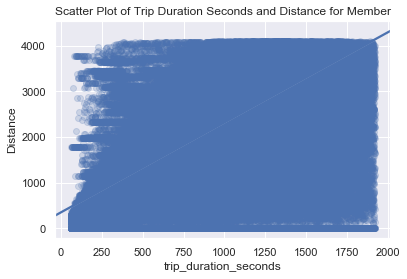

In [58]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x='trip_duration_seconds', y='Distance', data=all_quarters_member, scatter_kws={'alpha':0.2}).set_title('Scatter Plot of Trip Duration Seconds and Distance for Member')

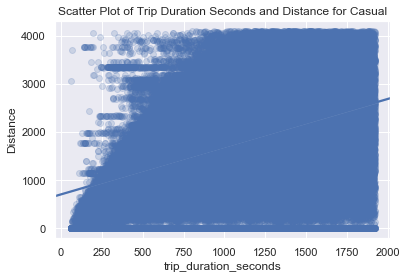

In [68]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x='trip_duration_seconds', y='Distance', data=all_quarters_casual, scatter_kws={'alpha':0.2}).set_title('Scatter Plot of Trip Duration Seconds and Distance for Casual')

Since from the above two plots, we can see that there are too many points on the plot, which makes it very messy, so I calculated the mean distance for each duration, and used scatter plots to plot the distribution and see the general relationship between them.

In [33]:
# calculate mean distance for each duration in all_quarters_member
distance_mean_member = pd.DataFrame(all_quarters_member.groupby('trip_duration_seconds')['Distance'].mean())
distance_mean_member['duration'] = distance_mean_member.index

In [34]:
# calculate mean distance for each duration in all_quarters_casual
distance_mean_casual = pd.DataFrame(all_quarters_casual.groupby('trip_duration_seconds')['Distance'].mean())
distance_mean_casual['duration'] = distance_mean_casual.index

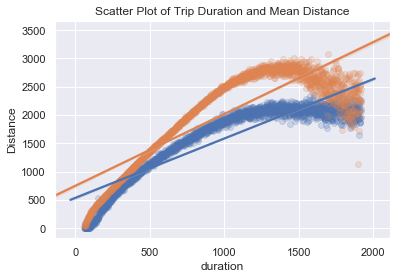

In [35]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x='duration', y='Distance', data=distance_mean_casual, scatter_kws={'alpha':0.2}).set_title('Scatter Plot of Trip Duration and Mean Distance')
bx = sns.regplot(x='duration', y='Distance', data=distance_mean_member, scatter_kws={'alpha':0.2})

From the plot, we can see that these two variables seem to have a strong positive linear relationship. So I further calculate the correlation coefficent of duration and mean distance.

In [36]:
distance_mean_member['duration'].corr(distance_mean_member['Distance'])

0.8518813667894566

In [37]:
distance_mean_casual['duration'].corr(distance_mean_casual['Distance'])

0.8977075581534268

Since both correlation coefficients are more than 0.85, so there is a strong positive linear relationship between duration and mean distance for both user types, that is as duration increases, mean distance also tends to increase. <br />
And since the correlation coefficient for casual is more than that for member, so there is a slightly more strong positive linear relationship between the two variables for casual than for member. <br />
So the relationship between these two variabes is the same as I expected.

### Difference in Trip Length for Member and Casual

First, we want to see a general difference in trip length for member and casual. We normally think that casual users take shorter trips compared to members, so is that true in fact? <br />

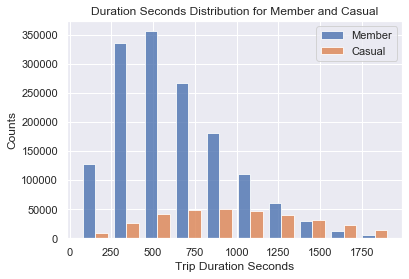

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(x=[all_quarters_member.trip_duration_seconds, all_quarters_casual.trip_duration_seconds], 
         ## more elegant code is: x=foursets[foursets.columns[::2]],
         alpha=0.8,
         label=["Member", "Casual"])
plt.title("Duration Seconds Distribution for Member and Casual")
plt.xlabel('Trip Duration Seconds')
plt.ylabel('Counts')
plt.legend(loc=1)
plt.show()

The distribution of duration seconds for member is right-skewed, and reaches its peak around 250-500 seconds(less than 10 minutes). While the distribution for casual is relatively more symmetric and reaches its peak around 900 seconds. <br />
To further see the median, quantiles... I use boxplot to plot trip_duration_seconds.

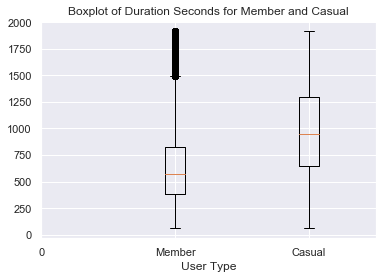

In [39]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = np.arange(3)
duration = [all_quarters_member.trip_duration_seconds, all_quarters_casual.trip_duration_seconds]
plt.boxplot(duration)
plt.xlabel('User Type')                ## Label the x axis
plt.title('Boxplot of Duration Seconds for Member and Casual')
plt.xticks(x, ('0', 'Member', 'Casual'))
plt.show()

From the boxplot, we can see that q3, median, q1 of casual are all greater than member. So the fact is the opposite of what we expected, and casual users take longer trips compared to members.

Then, I will focus on the difference in distance of member and casual users.

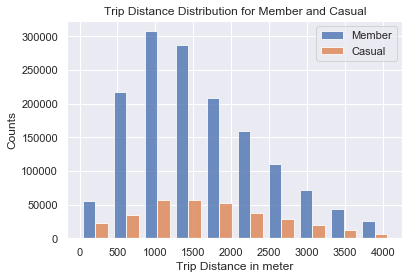

In [40]:
fig = plt.figure()
plt.hist(x=[all_quarters_member.Distance, all_quarters_casual.Distance], 
         ## more elegant code is: x=foursets[foursets.columns[::2]],
         alpha=0.8,
         label=["Member", "Casual"])
plt.title("Trip Distance Distribution for Member and Casual")
plt.xlabel('Trip Distance in meter')
plt.ylabel('Counts')
plt.legend(loc=1)
plt.show()

The distributions of distance for both member and casual are both right skewed. And from the plot, it seems that distribution of member is more right skewed than that of casual. And member reaches its peak around 1000, and the counts of 0-1500 are more than 1500-4000, while the counts of 0-1500, and 1500-4000 are more similar for casual, and casual user reaches its peak around 1000-2000.

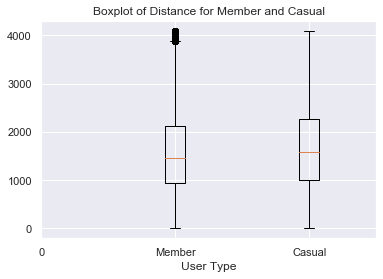

In [41]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = np.arange(3)
distance = [all_quarters_member.Distance, all_quarters_casual.Distance]
plt.boxplot(distance)
plt.xlabel('User Type')                ## Label the x axis
plt.title('Boxplot of Distance for Member and Casual')
plt.xticks(x, ('0', 'Member', 'Casual'))
plt.show()

The distribution of member has a lot of outliers, while there is no outlier in casual. And also, Q3, median, Q1 of distance for casual users are slightly greater than member.

In both dimensions, casual users take longer trips compared to members. And this is reasonable, since many casual users purchase the [3.25 SINGLE TRIP](https://bikesharetoronto.com/pricing/), since the price is fixed, so if they only need 5-minute ride, they will not purchase it since it will be too expensive. 

### The effect of weather on trip length for member and casual

In this [blog](https://towardsdatascience.com/exploring-toronto-bike-share-ridership-using-python-3dc87d35cb62), it suggests that members are using Bike Share for method of commute while casual users are using Bike Share for leisure trips, so by looking at whether they behave differently in different weather conditions also help generate whether the indication in the blog is correct.

Since weather data is scraped from the website, and each url only shows the chart for one month, so I need to merge them into a new dataframe.

In [42]:
year = 2016   #year for first trip row
month = 7     #month for first trip row
total_weather = []
while (year != 2017 or month != 13):  
    url = 'https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year='+str(year)+'&Month='+str(month)+'#'
    weather_data = pd.read_html(url)
    weatherdf = weather_data[0]
    total_weather.append(weatherdf)
    month += 1
    if (month == 13 and year == 2016):      #change 2016.13 to 2017.1
        year = 2017
        month = 1
total_weather = pd.concat(total_weather)

In [43]:
# drop unnecessary rows
total_weather = total_weather[(total_weather.DAY != 'Xtrm') & (total_weather.DAY != 'Avg') 
                              & (total_weather.DAY != 'Sum') & (total_weather.DAY != 'Summary, average and extreme values are based on the data above.')]

Since plot the distribution of trip length and temperature/ precipitation of all rows will be messy, so I calculate the mean distance and mean duration of each day, and store them in a new dataframe, also with the temperature/ precipitation of that day.

In [44]:
weather_member = pd.DataFrame(all_quarters_member.groupby('Date')['trip_duration_seconds'].mean())
weather = pd.DataFrame(total_weather['Mean Temp Definition°C'])

# modify data with wrong value
weather['Mean Temp Definition°C'][343:344] = '20.7'
weather['Mean Temp Definition°C'][478:479] = '15.6'
weather['precip'] = total_weather['Total Precip Definitionmm']
weather.index = weather_member.index

# modify data with wrong value
weather['Mean Temp Definition°C'][343:344] = '20.7'
weather['Mean Temp Definition°C'][495:496] = np.nan
weather = weather[(weather['precip'] != 'LegendTT') & (weather['precip'] != 'LegendMM')]
weather['precip'][407:408] = '0.0'

# store variables into one dataframe
weather_member['Mean Temp'] = pd.Series(weather['Mean Temp Definition°C']).astype(float)
weather_member['Total Precip'] = pd.Series(weather['precip']).astype(float)
weather_member['mean distance'] = pd.DataFrame(all_quarters_member.groupby('Date')['Distance'].mean()).astype(float)

In [45]:
weather_casual = pd.DataFrame(all_quarters_casual.groupby('Date')['trip_duration_seconds'].mean())
weather = pd.DataFrame(total_weather['Mean Temp Definition°C'])
weather['precip'] = total_weather['Total Precip Definitionmm']

# modify data with wrong value for Mean Temp Definition°C
weather['Mean Temp Definition°C'][343:344] = '20.7'
weather['Mean Temp Definition°C'][478:479] = '15.6'
weather['Mean Temp Definition°C'][495:496] = np.nan
weather.index = weather_casual.index

# modify data with wrong value for precip
weather = weather[(weather['precip'] != 'LegendTT') & (weather['precip'] != 'LegendMM')]
weather['precip'][407:408] = '0.0'

# store variables into one dataframe
weather_casual['Mean Temp'] = weather['Mean Temp Definition°C'].astype(float)
weather_casual['Total Precip'] = pd.Series(weather['precip']).astype(float)
weather_casual['mean distance'] = pd.DataFrame(all_quarters_casual.groupby('Date')['Distance'].mean()).astype(float)
weather_casual['trip_duration_seconds'] = pd.to_numeric(weather_casual['trip_duration_seconds'])

Since temperature and precipitation mainly affect trip length, and people generally do not want to ride bikes for a long time during extreme cold or extreme hot days. Also, heavy snow or rain will also affect trip length. So in this question, I mainly focus on the temperature and precipitation. And since temperature, precipitation, mean distance, mean duration are all quantative variables, so I will use scatterplot to see the relationship. Also, since  I want to plot the relationship between temperature, precipitation, mean distance, mean duration, so for each user tpye, I will need 4 plots, and that will be difficult to read and compare if I plot them one by one, so I use correlogram to show the relationship.

<function matplotlib.pyplot.show(*args, **kw)>

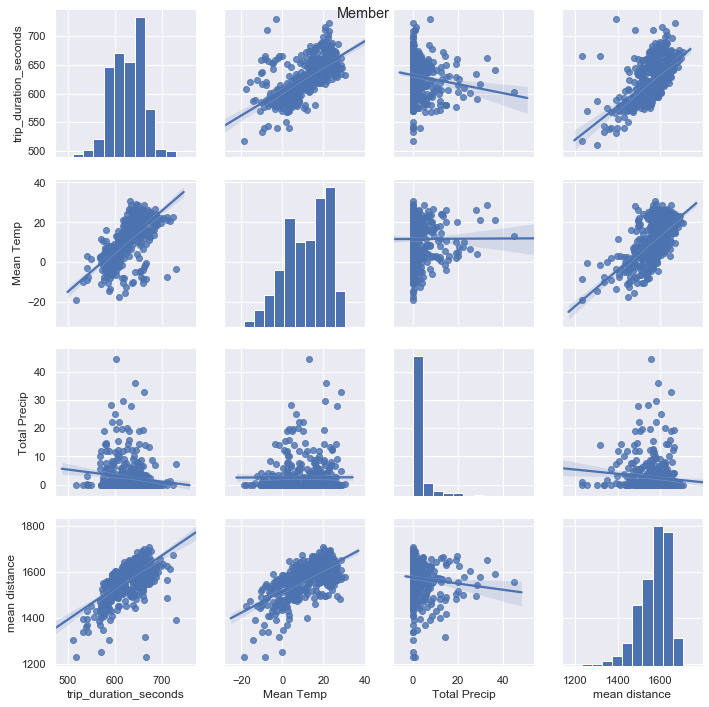

In [46]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(weather_member, kind="reg")
g.fig.suptitle('Member')
plt.show

The two plots at the center of the top are the scatter plot for mean temperature and trip duration seconds, and total precipitation and trip duration seconds. And the two plots at the center of the bottom are the scatter plot for mean temperature and distance, and total precipitation and distance. <br />
The correlogram above shows that there seems to be a positive relationship between temperature and trip length, that the lower the temperature is, the less trip length of member will be. And surprisingly, the precipitation does not affect trip length, and the distribution is scattered. But since precipitation is measured through the whole day, and it is very unlikely to be rainy all day in reality, so this investigation result may also make sense.

<function matplotlib.pyplot.show(*args, **kw)>

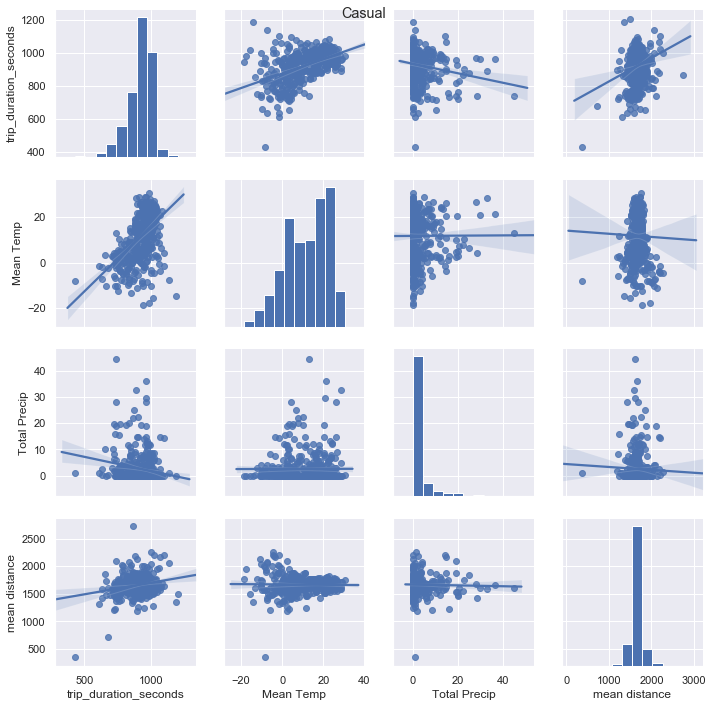

In [47]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(weather_casual, kind="reg")
g.fig.suptitle('Casual')
plt.show


The relationship between temperature and trip length of casual users is not as strong as that of members, especially with low mean temperature, the points are very scattered. Also, for casual users, linear relationship between precipitation and trip length does not exist.

Then, I calculated correlation coefficients to better see the linear relationship between weather and trip length for both user types.

In [48]:
# calculate correlation coefficients
temp_du_member = weather_member['Mean Temp'].corr(weather_member['trip_duration_seconds'])
temp_du_casual = weather_casual['Mean Temp'].corr(weather_casual['trip_duration_seconds'])
temp_di_member = weather_member['Mean Temp'].corr(weather_member['mean distance'])
temp_di_casual = weather_casual['Mean Temp'].corr(weather_casual['mean distance'])
precip_du_member = weather_member['Total Precip'].corr(weather_member['trip_duration_seconds'])
precip_du_casual = weather_casual['Total Precip'].corr(weather_casual['trip_duration_seconds'])
precip_di_member = weather_member['Total Precip'].corr(weather_member['mean distance'])
precip_di_casual = weather_casual['Total Precip'].corr(weather_casual['mean distance'])

In [49]:
# store all correlation coefficients into one dataframe
correlation = [['member', temp_du_member, temp_di_member, precip_du_member, precip_di_member], ['casual', temp_du_casual, temp_di_casual, precip_du_casual, precip_di_casual]] 
df_corr = pd.DataFrame(correlation, columns = ['user_type', 'corr_for_temp_duration', 'corr_for_temp_distance', 'corr_for_precip_duration', 'corr_for_temp_distance'])

In [50]:
df_corr

,user_type,corr_for_temp_duration,corr_for_temp_distance,corr_for_precip_duration,corr_for_temp_distance
0,member,0.661310,0.653439,-0.130268,-0.100767
1,casual,0.500201,-0.019969,-0.176867,-0.029699


For member, there is a strong positive relationship between temperature and trip length, no matter trip length is measured in distance or duration, the correlation coefficients are all greater than 0.65. However, for casual users, there is a linear relationship between temperature and duration, but there is not linear relationship between temperature and distance. Also, the linear relationship is weaker than member. However, precipitation does not affect trip length for both user types. <br />
This to some extent helps support the claim that members are using Bike Share for method of commute while casual users are using Bike Share for leisure trips. Since for casual users, their trip schedule is fixed, so in some cold weather, if they want to go round Toronto, they will still choose to ride bikes, while in cold days, member can choose to ride to the bus station or subway station to take a bus or subway instead.

### The effect of season on trip length for member and casual

Since we have shown the mean temperature will affect trip length, and since winters have more days with low temperatures, and summers have more days with high temperatures. So does that suggest that season also have effect on trip length and we will then explore the effect of season on trip length.

In [51]:
# calculate the mean trip_duration_seconds for each day and store it with date into a new dataframe
df = pd.DataFrame(all_quarters_member.groupby('Date')['trip_duration_seconds'].mean())
df['Date'] = df.index
df['user_type'] = 'member'
casual_df = pd.DataFrame(all_quarters_casual.groupby('Date')['trip_duration_seconds'].mean())
casual_df['Date'] = casual_df.index
casual_df['user_type'] = 'casual'
df = df.append(casual_df)

In [52]:
# calculate the mean Distance for each day and store it with date into a new dataframe
df2 = pd.DataFrame(all_quarters_member.groupby('Date')['Distance'].mean())
df2['Date'] = df2.index
df2['user_type'] = 'member'
casual_df = pd.DataFrame(all_quarters_casual.groupby('Date')['Distance'].mean())
casual_df['Date'] = casual_df.index
casual_df['user_type'] = 'casual'
df2 = df2.append(casual_df)

Since I want to see the trend of trip length, so I use relplot to better see how trip length changes in one and a half year.

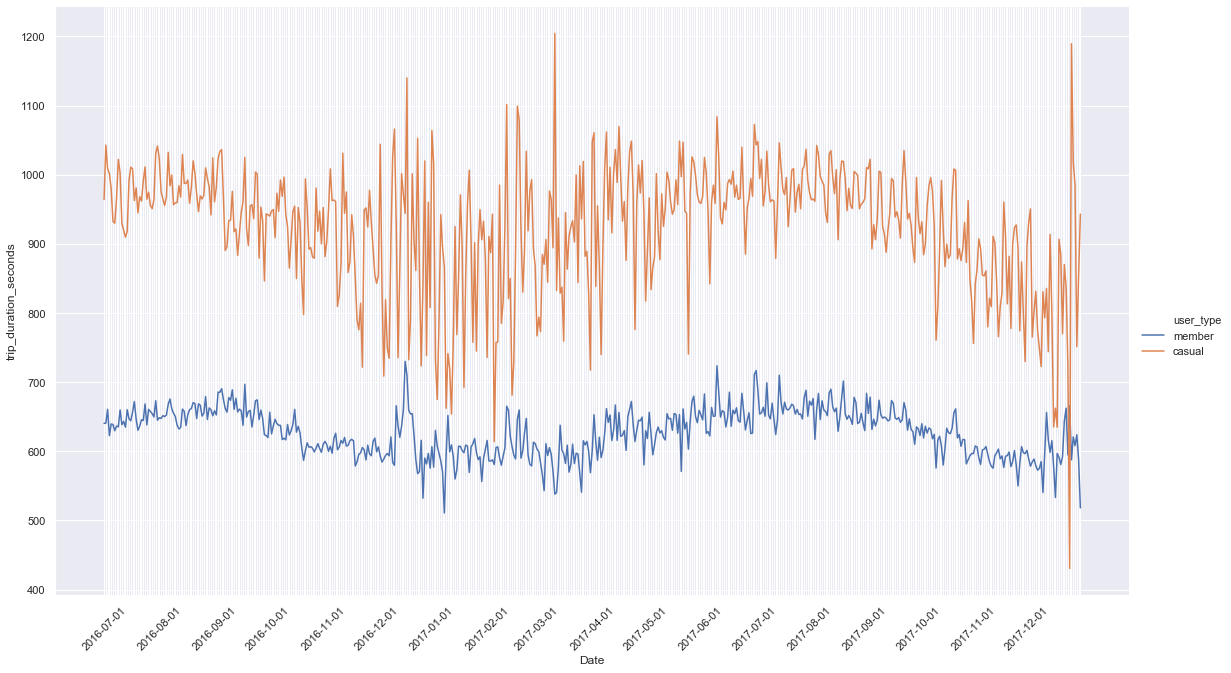

In [53]:
p = sns.relplot(x='Date', y='trip_duration_seconds', hue='user_type', data=df, kind='line', height=9, aspect=16/9.)
g.fig.suptitle('Mean trip_duration_seconds of each day')

# Limit the number of labels shown on the x-axis to only show the first day of each month
p.ax.set_xticklabels([x.set_text('') if not x.get_text().endswith('-01') else x for x in p.ax.get_xticklabels()], rotation=45)
plt.savefig('ridership2.png')

From the relplot above, the trip duration of member and casual users changes simultaneously, and duration inceases during March to August and reaches maximum in August, and then decreases from August to January/February, which shows that the season affects the trip duration. And this result makes sense since the temperature in January and February is low, while in August is high, and in the previous part, I've shown there is a positive linear relationship between temperature and trip duration. And also, from the relplot, we can see that the trend of the trip duration seconds is far more smooth in member than in casual, this means that trip duration of members is more fixed than that of casual users.

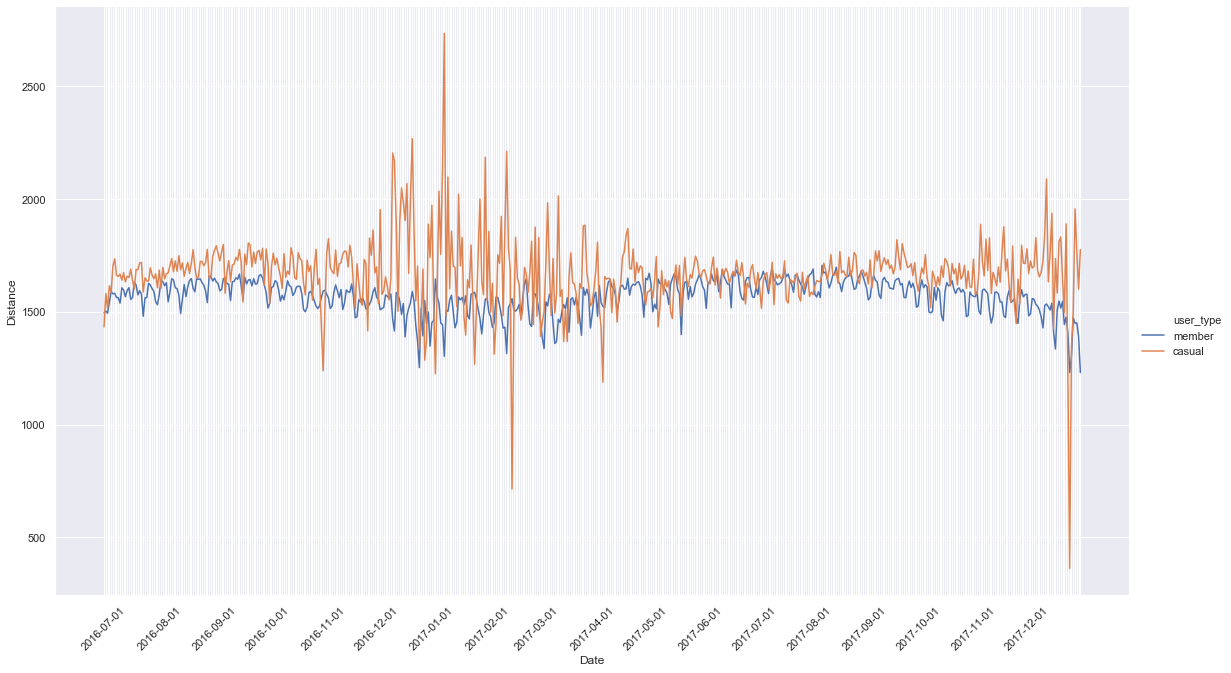

In [54]:
p = sns.relplot(x='Date', y='Distance', hue='user_type', data=df2, kind='line', height=9, aspect=16/9.)

# Limit the number of labels shown on the x-axis to only show the first day of each month
p.ax.set_xticklabels([x.set_text('') if not x.get_text().endswith('-01') else x for x in p.ax.get_xticklabels()], rotation=45)
plt.savefig('ridership3.png')

In this replot, we can also see that distance increases from March to August and decreases from August to February for member. <br />
And from the relplot that shows the trend of distance, it is more obvious that trip distance of members is more fixed than that of casual users, and this makes sense, since members are likely to use bikes on a regular basis, so the distance and duration of them are fixed everyday, while casual users are likely to use bikes for city tour, so the trip length of each tourist may vary greatly. <br />
And compare the relplots for duration and distance, I found that in all months, the mean distance each day of member and casual is similar, however, casual users take far more time than member. And this indicates that members are more familiar with the road than casual users, also, it suggests that members are not using bikes for city tour, since they are very familiar with the road, and casual users may use the bikes as a way for city tour. <br />

### Conclusion, Limitation and Next Step

In the analysis of the Toronto Bikeshare Ridership Data, by showing the difference between trip duration for members and casual users and whether different conditions like weather, season affect trip duration of members and casual users, I get evidence to further support the claim shown in this [blog](https://towardsdatascience.com/exploring-toronto-bike-share-ridership-using-python-3dc87d35cb62) that the majority of Toronto Bikeshare users are not tourists, but commuters who bikes on a regular basis. This helps reveal the implicit information not shown in the dataset. So in fact, Toronto Bikeshare should not be considered as a major way to promote tourism, but a way to make it convenient to work or go to school for local users. And also since the trip length in cold weather is lower than other time, one possible reason is that people do not want to go outside during cold weather, but another reason maybe the road is not safe enough for riding bikes. So further investigation can look for a specific user's trip length during all seasons, and trace to station and from station to see whether it indicates the potential safety hazard of bikeways during winter. <br />
Also, in my report, to make it more clear for visualization and analysis, I used mean instead of the whole data of some columns like distance, so this can also introduce bias, and for next step, we can use the whole data instead of the mean to make further analysis.